# Random, stationary performance


## Set up


In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from src import process
from src import plot
from src import util

# Load the CSV file results.csv into a dataframe and add some processed columns
df = process.load_processed_results()

display(df.tail())

,id,is_pb,wpm,acc,raw_wpm,consistency,char_stats,mode,mode2,quote_length,...,iti_all,iti_session,time_since_last_new_sesh,combined_id,trial_type_id,z_wpm,z_acc,trial_num,trial_type_num,log_norm_wpm
1823,65940c8ea65b7d25a1993863,0,33.2,96.80,33.2,60.01,"332,0,0,0",time,120,-1,...,18.0,18.0,138000,29,2,1.445331,1.029419,1824,358,7.839566
1824,65940d16a65b7d25a1993e31,0,31.0,91.20,31.0,61.47,"310,0,0,0",time,120,-1,...,16.0,16.0,274000,29,2,0.914677,-0.514066,1825,359,6.796597
1825,65955ea2a65b7d25a1a4b674,0,33.5,95.99,33.5,63.41,"335,0,0,0",time,120,-1,...,86292.0,NaN,0,29,2,1.517693,0.806165,1826,360,7.981789
1826,65955f2ea65b7d25a1a4bc77,0,33.4,95.20,33.4,62.92,"334,0,0,0",time,120,-1,...,20.0,20.0,140000,29,2,1.493572,0.588423,1827,361,7.934381
1827,65955faba65b7d25a1a4c20f,0,29.7,90.91,29.7,58.77,"297,0,0,0",time,120,-1,...,5.0,5.0,0,29,2,0.601110,-0.593997,1828,362,6.180298


## Best-to-date performance from stationary distribution

If we assume stationary performance, what does the best-to-date performance look like?

See <https://en.wikipedia.org/wiki/Extreme_value_theory>

What does the best-to-date performance look like if we use different distributions describing the variability in trial performance?


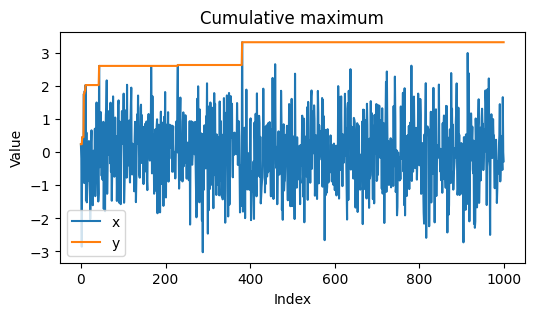

In [3]:
# Generate a list of random numbers from a gaussian distribution
# with a mean of 0 and a standard deviation of 1

np.random.seed(20210714)
x = np.random.normal(0, 1, 1000)

# Calcualte the cumulative maximum value of x
y = np.maximum.accumulate(x)

# Plot the data
fig = plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.plot(x, label="x")
ax.plot(y, label="y")
ax.set_title("Cumulative maximum")
ax.set_ylabel("Value")
ax.set_xlabel("Index")
ax.legend()
plt.show()

Fit parameters: y0=0.9664, alpha=0.1144


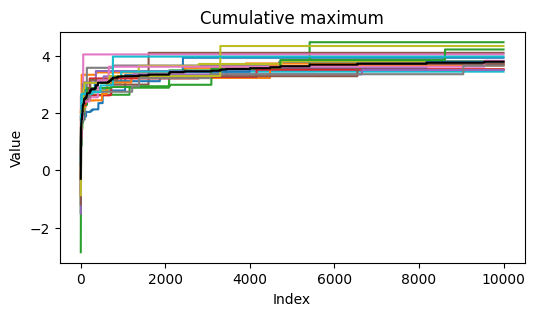

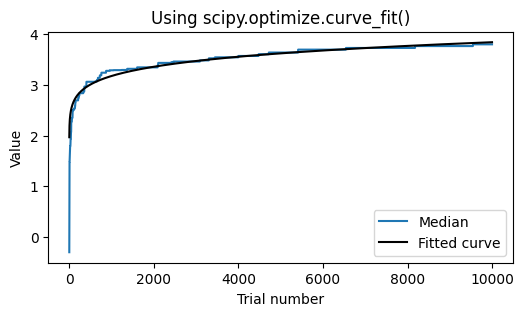

In [4]:
# Do the same as above, but 1000 trials for 100 times
np.random.seed(20210714)
x = np.random.normal(0, 1, (10000, 20))

# Calcualte the cumulative maximum value of x
y = np.maximum.accumulate(x, axis=0)

# Plot the data
fig = plt.figure(figsize=(6, 3))
ax = plt.axes()
# ax.plot(x, label='x')
ax.plot(y, label="y")
ax.set_title("Cumulative maximum")
ax.set_ylabel("Value")
ax.set_xlabel("Index")

# Calcualte the median of y
y_median = np.median(y, axis=1)

# Plot the median
ax.plot(y_median, "k", label="Median")

# Using scipy, fit a log curve to the median of y as a function of trial number
# Have an initial guess as to what the values of the parameters are:
y0_guess = 0.5
alpha_guess = 1 / 0.3

popt, pcov = curve_fit(
    lambda t, y0, alpha: y0 + t**alpha,
    np.arange(1, len(y_median) + 1),
    y_median,
    p0=(y0_guess, alpha_guess),
)

# The optimised values of the parameters are
y0 = popt[0]
alpha = popt[1]
print(f"Fit parameters: y0={y0:.4f}, alpha={alpha:.4f}")

# Create the fitted curve
y_fitted = y0 + np.arange(1, len(y_median) + 1) ** alpha

# On a new plot, plot the median and the fitted curve
fig = plt.figure(figsize=(6, 3))
ax = plt.axes()
ax.plot(y_median, label="Median")
ax.plot(y_fitted, "k", label="Fitted curve")
ax.set_title("Using scipy.optimize.curve_fit()")
ax.set_ylabel("Value")
ax.set_xlabel("Trial number")
ax.legend()
plt.show()

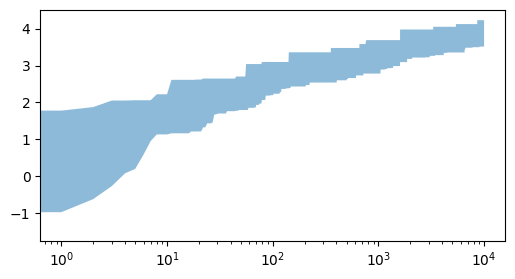

In [5]:
# Plot the median and errorbars of y in seaborn
y_df = pd.DataFrame(y)
fig = plt.figure(figsize=(6, 3))
ax = plt.axes()
# sns.lineplot(data=y_df, x=y_df.index, y=y_df.median(axis=1))
ax.fill_between(
    y_df.index, y_df.quantile(0.1, axis=1), y_df.quantile(0.9, axis=1), alpha=0.5
)
ax.set_xscale("log")
plt.show()